# Linear Algebra Basics

### Why Study Linear Algebra?

Think of Linear Algebra as basic operatons on vectors and matrices.

You've seen how we can represent groups of numbers in vectors and matrices. This makes them easier to manage. But once we do that, we need to be able to decide what add, subtract, multiply etc. mean on these "numbers".

So, we learn Linear Algebra so that we can do basic maths on these "numbers". We'll see examples of parallels here in a while.

### Vectors

A **vector** in $\mathbb{R}^n$ is an *n*-tuple. They can be **horizontal** and are called **row vectors** or **vertical** in which case they are called **column vectors** (the default).

We created and looked at basic vectors in the numpy intro.



### Vector Norm

The **norm** of a vector is a measure of its length. There are many ways of defining the length of a vector depending on the metric used (i.e., the distance formula chosen). So, let's take a look at some distance formulae first.



#### Euclidean Distance

Euclidean distance is what you are already familiar with. The Euclidean distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ is given as:

$$
\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

Visually, this would look like (see notebook for this).

If we take any vector and take its $x$- and $y$-coordinates as its components, we can redefine the above like so:

This length is then called the *L-2* Norm of the vector -- the stuff you know as the magnitude.  
The specific formula then is:

$$
\|v\|_2 = \sqrt{\sum_i v_i^2}
$$

where $v_i$ are the elements of the vector $v$.



#### Manhattan Distance

What happens if we don’t square the values? It doesn’t make sense in the Pythagorean sense of the value but sometimes, it is quite useful.

Let’s first see what the Manhattan distance between two points is.

The Manhattan distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ is given as:

$$
(x_2 - x_1) + (y_2 - y_1)
$$

So, basically just adding up the components. Visually, this looks like this: (see notebook)

And the formula is simple too:

$$
\|v\|_1 = \sum_i |v_i|
$$


Let’s try this out!

### Numpy Vectors Revisited

In [1]:
import numpy as np 
from numpy.linalg import norm

In [2]:
vector_row = np.array([[1, -5, 3, 2, 4]])
print(vector_row)
new_vector = vector_row.T
print(new_vector)

norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)

print('L_1 is: %.1f'%norm_1)
print('L_2 is: %.1f'%norm_2)

[[ 1 -5  3  2  4]]
[[ 1]
 [-5]
 [ 3]
 [ 2]
 [ 4]]
L_1 is: 15.0
L_2 is: 7.4


In [ ]:
u = np.array([[0, 3, 2]])
v = np.array([[4, 1, 1]])
w = np.array([[0, -2, 0]])

x = 3*u - 2*v + 4*w

print(x)

In [ ]:
print(u)
print(v)
print(v.T)

u.dot(v)   #  .... Read the error!

In [ ]:
print(u.shape)
print(v.shape)

In [ ]:
u = np.array([[0, 3, 2]])
v = np.array([4, 1, 1])    # notice the change here! 

x = u * v 

print(x)

In [ ]:
print(u)
print(v)
print(v.T) # Does nothing ... 

u.dot(v)   # this works here!

In [ ]:
print(u.shape)
print(v.shape)

### Matrices
Let's see the basics of matrices one more time. Let's also see the relevant terminlogy side by side.
#### Matrix Multiplication

In [ ]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(Q)
print(np.dot(P, Q))

np.dot(Q, P) # can't do that

In [ ]:
P.shape, Q.shape

#### Determinants

In [ ]:
from numpy.linalg import det

M = np.array(
             [  [0, 2, 1, 3], 
                [3, 2, 8, 1], 
                [1, 0, 0, 3],
                [0, 3, 2, 1]  ]
            )
print('M:\n', M)

print('Determinant: %.1f' % det(M))

I = np.eye(4)  # eye-dentity matrix 

print('I:\n', I)
print('M*I:\n', np.dot(M, I))

Highly recomment the video by 3Blue1Brown on determinants: https://www.youtube.com/watch?v=Ip3X9LOh2dk

#### Inverse, Singular, Ill-conditioned
When you multiply something by a matrix and you want to get back, you multiply the result with the inverse of the original matrix. This is similar to multiplying by the reciprocal to reverse the effect of a multiplication.

In [ ]:
from numpy.linalg import inv

print('Inv M:\n', inv(M))

In [ ]:
P = np.array([[0,1,0],
              [0,0,0],
              [1,0,1]])     # P has no inverse since it is singular. 

print('det(P):', det(P))

inv(P)

So, multiplying by a singular matrix is sort of like multiplying by 0. It's not reversible.

Ill-conditioned matrices are not singular but their determinant is very close to 0. This makes them problematic just like multiplication by very small numbers can lead to overflow, underflow etc.

#### Rank, Full Rank, Condition Number, Augmented Matrix

**Rank**, $\text{rank}(A)$, is the number of linearly independent columns or rows of $A$.



**Full rank** if  $$\text{rank}(A) = \min(m, n)$$ for an $m \times n$ matrix.



**Condition Number**: How close is a matrix to being ill-conditioned? Higher is closer to being singular.



**Augmented Matrix**: $[A|y]$ where $A$ is a matrix and $y$ is a vector. $y$ is called *new* if it cannot be expressed as a combination of columns of $A$. In this case: $$\text{rank}([A|y]) = \text{rank}(A) + 1$$ (because we just added a new independent column!)


In [ ]:
from numpy.linalg import cond, matrix_rank

A = np.array([[1,1,0],
              [0,1,0],
              [1,0,1]])

print('Condition number:\n', cond(A))

print('Rank:\n', matrix_rank(A))

y = np.array([[1, 2, 1]]).T    # need a column vector. Easier to create it using .T 

A_y = np.concatenate((A, y), axis = 1)  # Notice the axis 
print('Augmented matrix:\n', A_y)

## Solving Linear Equations

### LU Decomposition

In [ ]:
import numpy as np 
from numpy.linalg import inv

import scipy 

from scipy.linalg import lu

In [ ]:
help(lu)

In [ ]:
A = np.array([ 
              [  1,  1,   1,   1 ], 
              [  2,  3,   1,   5 ], 
              [ -1,  1,  -5,   3 ], 
              [  3,  1,   7,  -2 ]  
             ], dtype=float)

In [ ]:
P, L, U = lu(A)

print("A:")
print(A)

print("P:")   # What is this guy? 
print(P)

print("L:")
print(L)

print("U:")
print(U)

# Is the answer the same as what we got?

In [ ]:
L = P.dot(L)   # Let's just do this once

In [ ]:
L.dot(U)     # Produces the same result though

In [ ]:
A

In [ ]:
L.dot(U) == A   # !!! the horror!

In [ ]:
np.allclose(L.dot(U), A)  # Why?

In [ ]:
help(np.allclose)

In [ ]:
np.allclose(L.dot(U), A)  # Why?

In [ ]:
y = np.array([10, 31, -2, 18])       # Is something wrong here? 
print(y)

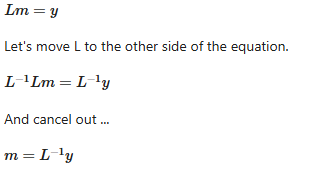

In [ ]:
m = inv(L).dot(y)

In [ ]:
print(m)

In [ ]:
x = inv(U).dot(m)

In [ ]:
print(x)   # Match this with our on-paper results.

In [ ]:
yp = A.dot(x)
print(yp)

In [ ]:
np.allclose(y, yp)

### Gauss-Seidel Method

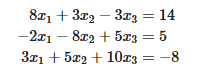

In [ ]:
a = [
        [ 8,  3, -3 ], 
        [-2, -8,  5 ], 
        [ 3,  5,  10]
    ]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 
print(diag)

In [ ]:
np.sum(np.abs(a), axis=1)

In [ ]:
# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag 
print(off_diag)

In [ ]:
if np.all(diag > off_diag):
    print('matrix is diagonally dominant')    # will converge (sufficient condition)
else:
    print('NOT diagonally dominant')          # may or may not converge (because NOT a necessary condition)

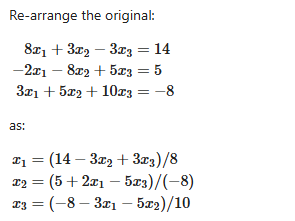

In [ ]:
# Let's apply the iterative method starting at 0 

x1 = 0
x2 = 0
x3 = 0
epsilon = 0.001   # also try better precision
converged = False

x_old = np.array([x1, x2, x3])

In [ ]:
max_iterations = 50

In [ ]:
print('Iteration results')
print('k      x1        x2        x3 ')

for k in range(1, max_iterations):
    
    x1 = (14 -  3*x2  +  3*x3)  /  8
    x2 = (5  +  2*x1  -  5*x3)  / (-8)
    x3 = (-8 -  3*x1  -  5*x2)  / 10
    
    x = np.array([x1, x2, x3])
    
    print("%2d   %.4f   %.4f   %.4f" % (k, x1, x2, x3))
    
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converged, increase the # of iterations')

In [ ]:
8*x1 + 3*x2 - 3*x3

In [ ]:
-2*x1 - 8*x2 + 5*x3

In [ ]:
3*x1 + 5*x2 + 10*x3

Let's try one where this does NOT work!

In [ ]:
a = [
        [ 1,  3, -3 ], 
        [-2, -1,  5 ], 
        [ 3,  5,  1]
    ]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 
print(diag)

off_diag = np.sum(np.abs(a), axis=1) - diag 
print(off_diag)

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')    
else:
    print('NOT diagonally dominant')

In [ ]:
# Let's apply the iterative method starting at 0 

x1 = 0
x2 = 0
x3 = 0
epsilon = 0.001   # also try better precision
max_iterations = 10
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print('k      x1        x2        x3 ')

for k in range(1, max_iterations):
    
    x1 = (14 -  3*x2  +  3*x3)  /  1
    x2 = (5  +  2*x1  -  5*x3)  / (-1)
    x3 = (-8 -  3*x1  -  5*x2)  / 1
    
    x = np.array([x1, x2, x3])
    
    print("%2d   %.4f   %.4f   %.4f" % (k, x1, x2, x3))
    
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converged, increase the # of iterations')
    
# It may still have converged but it didn't ...

In [ ]:
# Just for reference, here's the code for crout's method

In [ ]:
def crout(A):
    
    n = A.shape[0]
    
    U = np.zeros((n, n), dtype=np.double)
    L = np.zeros((n, n), dtype=np.double)
    
    for k in range(n):
        
        L[k, k] = A[k, k] - L[k, :] @ U[:, k]
        
        U[k, k:] = (A[k, k:] - L[k, :k] @ U[:k, k:]) / L[k, k]
        L[(k+1):, k] = (A[(k+1):, k] - L[(k+1):, :] @ U[:, k]) / U[k, k]
    
    return L, U

In [ ]:
B = [[ 1, 2,  3],
       [ 1, 5, 20],
       [ 1,  9,  7]]
B = np.array(B)
L, U = crout(B)

In [ ]:
L

In [ ]:
U

In [ ]:
L @ U